# 2021/11/13
# 本代码绘制BOB的时间序列

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [2]:
with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

In [3]:
out_date(1981,122)

'0502'

In [17]:
# 筛选 晚年用红色，早年用蓝色
a  =  np.zeros(40,dtype=int).astype(dtype=str) ; a[:]  =  'grey'
color_list  =  a.tolist()#  ;  color_list[:]  =  'grey'

for i in range(0,40):
    if day[i] < np.mean(day) - np.std(day):
        color_list[i]  =  'blue'
    if day[i] > np.mean(day) + np.std(day)-1:
        color_list[i]  =  'red'
        


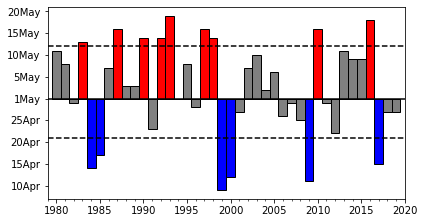

In [19]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# 设置y轴
y_label  =  ['10Apr','15Apr','20Apr','25Apr','1May','5May','10May','15May','20May']

fig,axs  =  plt.subplots(tight_layout=True)

# axs.set_yticks(np.arange(90, 160,10))

axs.bar(year,day-120,width=1,color=color_list,edgecolor='black')
# 刻度设置
axs.set_xlim(1979,2020)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_minor_locator(MultipleLocator(1))

axs.set_yticks(np.arange(-20,25,5))
axs.set_yticklabels(y_label)

axs.plot([1979,2020],[0,0],color='black')
axs.plot([1979,2020],[np.ceil(np.mean(day)-np.std(day))-120-1,np.ceil(np.mean(day)-np.std(day))-120-1],color='k',linestyle='dashed')
axs.plot([1979,2020],[np.floor(np.mean(day)+np.std(day))-120-1,np.floor(np.mean(day)+np.std(day))-120-1],color='k',linestyle='dashed')

axs.set_aspect(0.5)

plt.savefig('/home/sun/paint/lunwen/version2.0/fig1_v2.0_bob_time_seris_220411.pdf',dpi=2000)

plt.show()



In [6]:
np.std(day)

10.887033572098508

In [7]:
np.mean(day)

122.35

In [11]:
np.ceil(np.mean(day)-np.std(day))-1

111.0

In [13]:
out_date(1981,111)

'0421'

In [15]:
np.floor(np.mean(day)+np.std(day))

133.0